# Reinforcement Learning - A Simple Python Example and a Step Closer to AI with Assisted Q-Learning

In [12]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

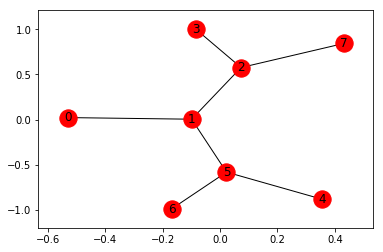

In [13]:
goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [14]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [15]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [16]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0
# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[  -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [   0.,   -1.,    0.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,    0.,   -1.,   -1.,   -1.,  100.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,   -1.,   -1.,    0.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,   -1.,    0.,   -1.,   -1.,   -1.,   -1.,  100.]])

In [55]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

print("available action ",available_act)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

print("action ",action)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  print("max index ",max_index)
    
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)
Q

available action  [0 2 5]
action  2
max index  [0 1 2 3 4 5 6 7]
max_value 0.0


matrix([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [56]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 0
max index  [0 1 2 3 4 5 6 7]
max_value 100.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [7]
max_value 180.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [7]
max_value 244.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [7]
max_value 295.2
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [7]
max_value 336.16
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score: 100.0
max index  [0 1 2 3 4 5 6 7]
max_value 0.0
Score:

max_value 234.009767444
Score: 935.885165557
max index  [2]
max_value 292.512209306
Score: 935.885165557
max index  [7]
max_value 498.111053407
Score: 935.979971052
max index  [7]
max_value 498.488842725
Score: 935.346407617
max index  [1]
max_value 234.009767444
Score: 935.346407617
max index  [7]
max_value 498.79107418
Score: 934.840247877
max index  [2]
max_value 292.512209306
Score: 934.840247877
max index  [5]
max_value 187.207813956
Score: 934.840247877
max index  [2]
max_value 318.79107418
Score: 935.522449379
max index  [2]
max_value 292.512209306
Score: 935.522449379
max index  [7]
max_value 398.488842725
Score: 935.522449379
max index  [7]
max_value 499.032859344
Score: 935.117632485
max index  [7]
max_value 499.226287475
Score: 934.794061297
max index  [1]
max_value 234.009767444
Score: 934.794061297
max index  [7]
max_value 398.488842725
Score: 934.794061297
max index  [7]
max_value 398.488842725
Score: 941.373959414
max index  [7]
max_value 398.488842725
Score: 941.3739594

Score: 982.592098696
max index  [1]
max_value 255.91692325
Score: 982.592098696
max index  [7]
max_value 499.896154063
Score: 982.546262375
max index  [1]
max_value 255.91692325
Score: 982.546262375
max index  [2]
max_value 319.91692325
Score: 982.550417075
max index  [2]
max_value 319.91692325
Score: 982.574371519
max index  [5]
max_value 204.670192579
Score: 982.574371519
max index  [7]
max_value 499.91692325
Score: 982.542897882
max index  [2]
max_value 319.91692325
Score: 982.542897882
max index  [1]
max_value 255.9335386
Score: 982.562060641
max index  [7]
max_value 499.91692325
Score: 982.566215169
max index  [1]
max_value 255.9335386
Score: 982.585377928
max index  [1]
max_value 255.9335386
Score: 982.585377928
max index  [7]
max_value 399.9335386
Score: 982.592856078
max index  [7]
max_value 399.9335386
Score: 982.592856078
max index  [1]
max_value 255.9335386
Score: 982.592856078
max index  [1]
max_value 255.9335386
Score: 982.592856078
max index  [7]
max_value 399.9335386
Sco

Most efficient path:
[0, 1, 2, 7]


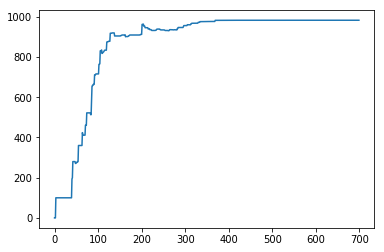

In [57]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

<img src="looking-for-honey.png">

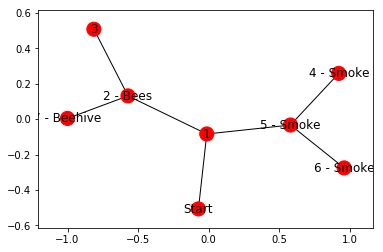

In [58]:
bees = [2]
smoke = [4,5,6]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - Bees', 3:'3', 4:'4 - Smoke', 5:'5 - Smoke', 6:'6 - Smoke', 7:'7 - Beehive'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)
plt.show()

In [59]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_bees = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_smoke = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in bees:
        found.append('b')

    if action in smoke:
        found.append('s')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  environment = collect_environmental_data(action)
  if 'b' in environment: 
    enviro_bees[current_state, action] += 1
  
  if 's' in environment: 
    enviro_smoke[current_state, action] += 1
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('Bees Found')
print(enviro_bees)
print('Smoke Found')
print(enviro_smoke)


max_value 0.0
max_value 0.0
max_value 100.0
max_value 100.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 100.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 180.0
max_value 80.0
max_value 0.0
max_value 80.0
max_value 0.0
max_value 64.0
max_value 80.0
max_value 64.0
max_value 0.0
max_value 80.0
max_value 64.0
max_value 0.0
max_value 244.0
max_value 0.0
max_value 0.0
max_value 195.2
max_value 0.0
max_value 195.2
max

max_value 0.0
max_value 0.0
Score: nan
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 155.555555556
going from: [0 2 5]
to: [0 2]
max_value 0.0
Score: 155.555555556
max_value 180.0
Score: 155.555555556
max_value 144.0
Score: 235.555555556
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 235.555555556
max_value 144.0
Score: 235.555555556
max_value 144.0
Score: 235.555555556
going from: [1 4 6]
to: [1]
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
max_value 0.0
Score: 235.555555556
going from: [0 2 5]
to: [0 2]
max_value 144.0
Score: 315.555555556
max_value 0.0
Score: 315.555555556
max_value 180.0
Score: 360.0
max_value 115.2
Score: 424.0
max_value 144.0
Score: 504.0
go

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


115.2
Score: 626.754098361
going from: [0 2 5]
to: [0 2]
max_value 195.2
Score: 647.737704918
max_value 92.16
Score: 647.737704918
max_value 195.2
Score: 668.721311475
max_value 156.16
Score: 685.508196721
max_value 92.16
Score: 685.508196721
max_value 156.16
Score: 685.508196721
max_value 195.2
Score: 685.508196721
max_value 92.16
Score: 685.508196721
max_value 195.2
Score: 685.508196721
max_value 156.16
Score: 702.295081967
max_value 156.16
Score: 766.295081967
going from: [1 4 6]
to: [1]
max_value 156.16
Score: 783.081967213
max_value 156.16
Score: 783.081967213
max_value 156.16
Score: 783.081967213
max_value 156.16
Score: 783.081967213
going from: [0 2 5]
to: [0 2]
max_value 195.2
Score: 783.081967213
max_value 156.16
Score: 783.081967213
max_value 156.16
Score: 783.081967213
max_value 156.16
Score: 783.081967213
max_value 256.16
Score: 775.640224859
max_value 124.928
Score: 788.432229856
max_value 124.928
Score: 788.432229856
going from: [0 2 5]
to: [0 2]
max_value 195.2
Score: 78

Score: 842.518050277
max_value 313.136514168
Score: 843.303672704
going from: [0 2 5]
to: [0 2]
max_value 250.509211334
Score: 843.303672704
going from: [0 2 5]
to: [0 2]
max_value 391.42064271
Score: 843.303672704
max_value 391.42064271
Score: 844.285700738
max_value 313.136514168
Score: 844.285700738
max_value 313.136514168
Score: 844.285700738
max_value 313.136514168
Score: 844.285700738
max_value 313.136514168
Score: 844.285700738
max_value 391.42064271
Score: 844.285700738
max_value 250.509211334
Score: 844.914198679
going from: [1 4 6]
to: [1]
max_value 313.136514168
Score: 844.914198679
max_value 493.136514168
Score: 842.757203508
max_value 313.136514168
Score: 842.757203508
max_value 250.509211334
Score: 843.383514587
max_value 493.136514168
Score: 843.731465187
going from: [0 2 5]
to: [0 2]
max_value 394.509211334
Score: 844.357776266
max_value 313.136514168
Score: 845.140665115
max_value 394.509211334
Score: 845.766976195
going from: [0 2 5]
to: [0 2]
max_value 394.509211334


going from: [0 2 5]
to: [0 2]
max_value 399.936695517
Score: 849.588318474
going from: [1 4 6]
to: [1]
max_value 319.949356413
Score: 849.588318474
max_value 255.959485131
Score: 849.590344538
max_value 399.936695517
Score: 849.590344538
max_value 255.959485131
Score: 849.590344538
max_value 255.959485131
Score: 849.590344538
max_value 255.959485131
Score: 849.590344538
going from: [0 2 5]
to: [0 2]
max_value 255.959485131
Score: 849.590344538
going from: [0 2 5]
to: [0 2]
max_value 399.936695517
Score: 849.590344538
going from: [0 2 5]
to: [0 2]
max_value 399.936695517
Score: 849.590344538
max_value 255.959485131
Score: 849.590344538
max_value 499.920869396
Score: 849.594301695
going from: [1 4 6]
to: [1]
max_value 319.949356413
Score: 849.594301695
going from: [0 2 5]
to: [0 2]
max_value 255.959485131
Score: 849.594301695
going from: [0 2 5]
to: [0 2]
max_value 255.959485131
Score: 849.594301695
going from: [0 2 5]
to: [0 2]
max_value 255.959485131
Score: 849.594301695
max_value 319.

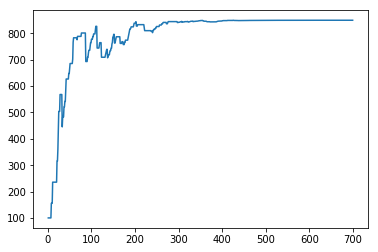

In [60]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_bees - enviro_smoke

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'b' in environment: 
        enviro_matrix[current_state, action] += 1
    if 's' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
 

plt.plot(scores)
plt.show()

In [61]:
enviro_matrix

matrix([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,   66.,    0.,    0.,  -32.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,  189.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0., -176.,    0.,    0.],
        [   0.,    0.,    0.,    0.,  -30.,    0.,  -30.,    0.],
        [   0.,    0.,    0.,    0.,    0., -173.,    0.,    0.],
        [   0.,    0.,   76.,    0.,    0.,    0.,    0.,    0.]])